# Ridge and Lasso Regularisation Using Boston Data

In [ ]:
Regularisation is a hypertuning technique which is used to treat overfitting model.
It tries to add some biasness so that the model becomes less generalised one .
There are 3 main regularisation techniques:
    Ridge
    Lasso
    Elastic net


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_boston

In [9]:
data=load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [17]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Price']=data.target

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Dividing data into attributes and target variables respectively

In [40]:
#attributes 
x=df.iloc[:,:-1]
x.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [43]:
#target 
y=df.iloc[:,-1:]
y.head(1)

,Price
0,24.0


## Starting with Linear regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
model=LinearRegression()
score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5 )
score

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [55]:
mean_score=score.mean()
mean_score #accuracy by linear regression

-37.131807467699076

## Ridge Regression:
### Here we will be trying to make our model less fit i.e we will try to add penalty so that accuracy decreases.

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [81]:
model1=Ridge() #alpha here is lamda
parameters={'alpha':[0,1,5,15,20,40,50,100]}
model2=GridSearchCV(model1,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
model3=model2.fit(x,y)
print(model3.best_score_)
print(model3.best_params_)

-29.905701947540358
{'alpha': 100}


In [123]:
#rechecking
model4=Ridge(100)
model4.fit(x,y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
score1=cross_val_score(model4,x,y,scoring='neg_mean_squared_error',cv=5 )
score1.mean()

-29.905701947540358

In [125]:
### So we decreased the model's accuracy from 37 to 29

In [128]:
y_predict=model4.predict(x_train)

22.994354641278687

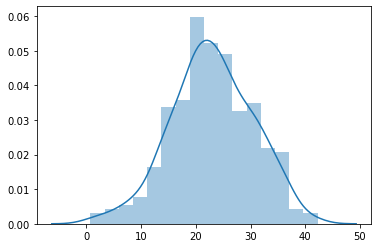

In [131]:
sns.distplot(y_predict)

# Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [98]:
model5=Lasso()# since i dont know the best value of alpha, therefore i will use grid searchcv for finding the same.
params={'alpha':[1,3,6,9,10,100,22,200]}
model6=GridSearchCV(model5,param_grid=params,cv=5,scoring='neg_mean_squared_error')
model7=model6.fit(x,y)
model7.best_params_
model7.best_score_

-35.53158022069486

In [110]:
#we can cross validate this by putting value of best aplha in model again.
model8=Lasso(1)
model8.fit(x,y)
score=cross_val_score(model8,x,y,scoring='neg_mean_squared_error',cv=5)
score.mean()

-35.53158022069486

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [120]:
ypredict_test=model8.predict(x_train)

In [129]:
import seaborn as sns

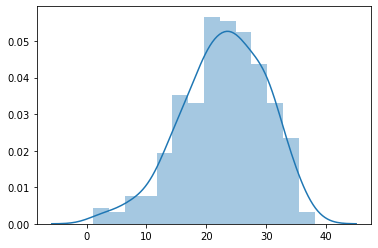

In [130]:
sns.distplot(ypredict_test)

In [ ]:
# Ridge regression is giving more stable distribution.